# JuliaDB + OnlineStats

[JuliaDB](https://github.com/JuliaComputing/JuliaDB.jl) is a package for working with large persistent datasets.  The online/parallel algorithms in OnlineStats work efficiently with `reduce` operations in JuliaDB to calculate statistics and models out-of-core or in parallel.

In [7]:
using JuliaDB, OnlineStats, Plots
gr(fmt = :png)

Plots.GRBackend()

## Basics

### The `reduce` function can accept Julia functions and `OnlineStat`s as reducers.

In [3]:
t = table(@NT(x = randn(100), y = randn(100)))

@show reduce(+, t, select = :x)

reduce(Sum(), t, select = :x)

reduce(+, t, select=:x) = -1.3430894540533118


Sum: n=100 | value=-1.34309

#### If the selection is multiple columns, the `OnlineStat` must be able to handle inputs of that size.  

- The `Group` type is used to apply stats to different columns.  A `Group` of the same stat can be created via integer multiplication.

In [5]:
reduce(2Mean(), t; select = (:x, :y))

Group
  ├── Mean: n=100 | value=-0.0134309
  └── Mean: n=100 | value=0.0704926

## Analyzing the `diamonds` Dataset

In [10]:
t = loadtable("datasets/diamonds.csv"; indexcols = [:carat])

Table with 53940 rows, 10 columns:
carat  cut          color  clarity  depth  table  price  x      y      z
───────────────────────────────────────────────────────────────────────────
0.2    "Premium"    "E"    "SI2"    60.2   62.0   345    3.79   3.75   2.27
0.2    "Premium"    "E"    "VS2"    59.8   62.0   367    3.79   3.77   2.26
0.2    "Premium"    "E"    "VS2"    59.0   60.0   367    3.81   3.78   2.24
0.2    "Premium"    "E"    "VS2"    61.1   59.0   367    3.81   3.78   2.32
0.2    "Premium"    "E"    "VS2"    59.7   62.0   367    3.84   3.8    2.28
0.2    "Ideal"      "E"    "VS2"    59.7   55.0   367    3.86   3.84   2.3
0.2    "Premium"    "F"    "VS2"    62.6   59.0   367    3.73   3.71   2.33
0.2    "Ideal"      "D"    "VS2"    61.5   57.0   367    3.81   3.77   2.33
0.2    "Very Good"  "E"    "VS2"    63.4   59.0   367    3.74   3.71   2.36
0.2    "Ideal"      "E"    "VS2"    62.2   57.0   367    3.76   3.73   2.33
0.2    "Premium"    "D"    "VS2"    62.3   60.0   367    

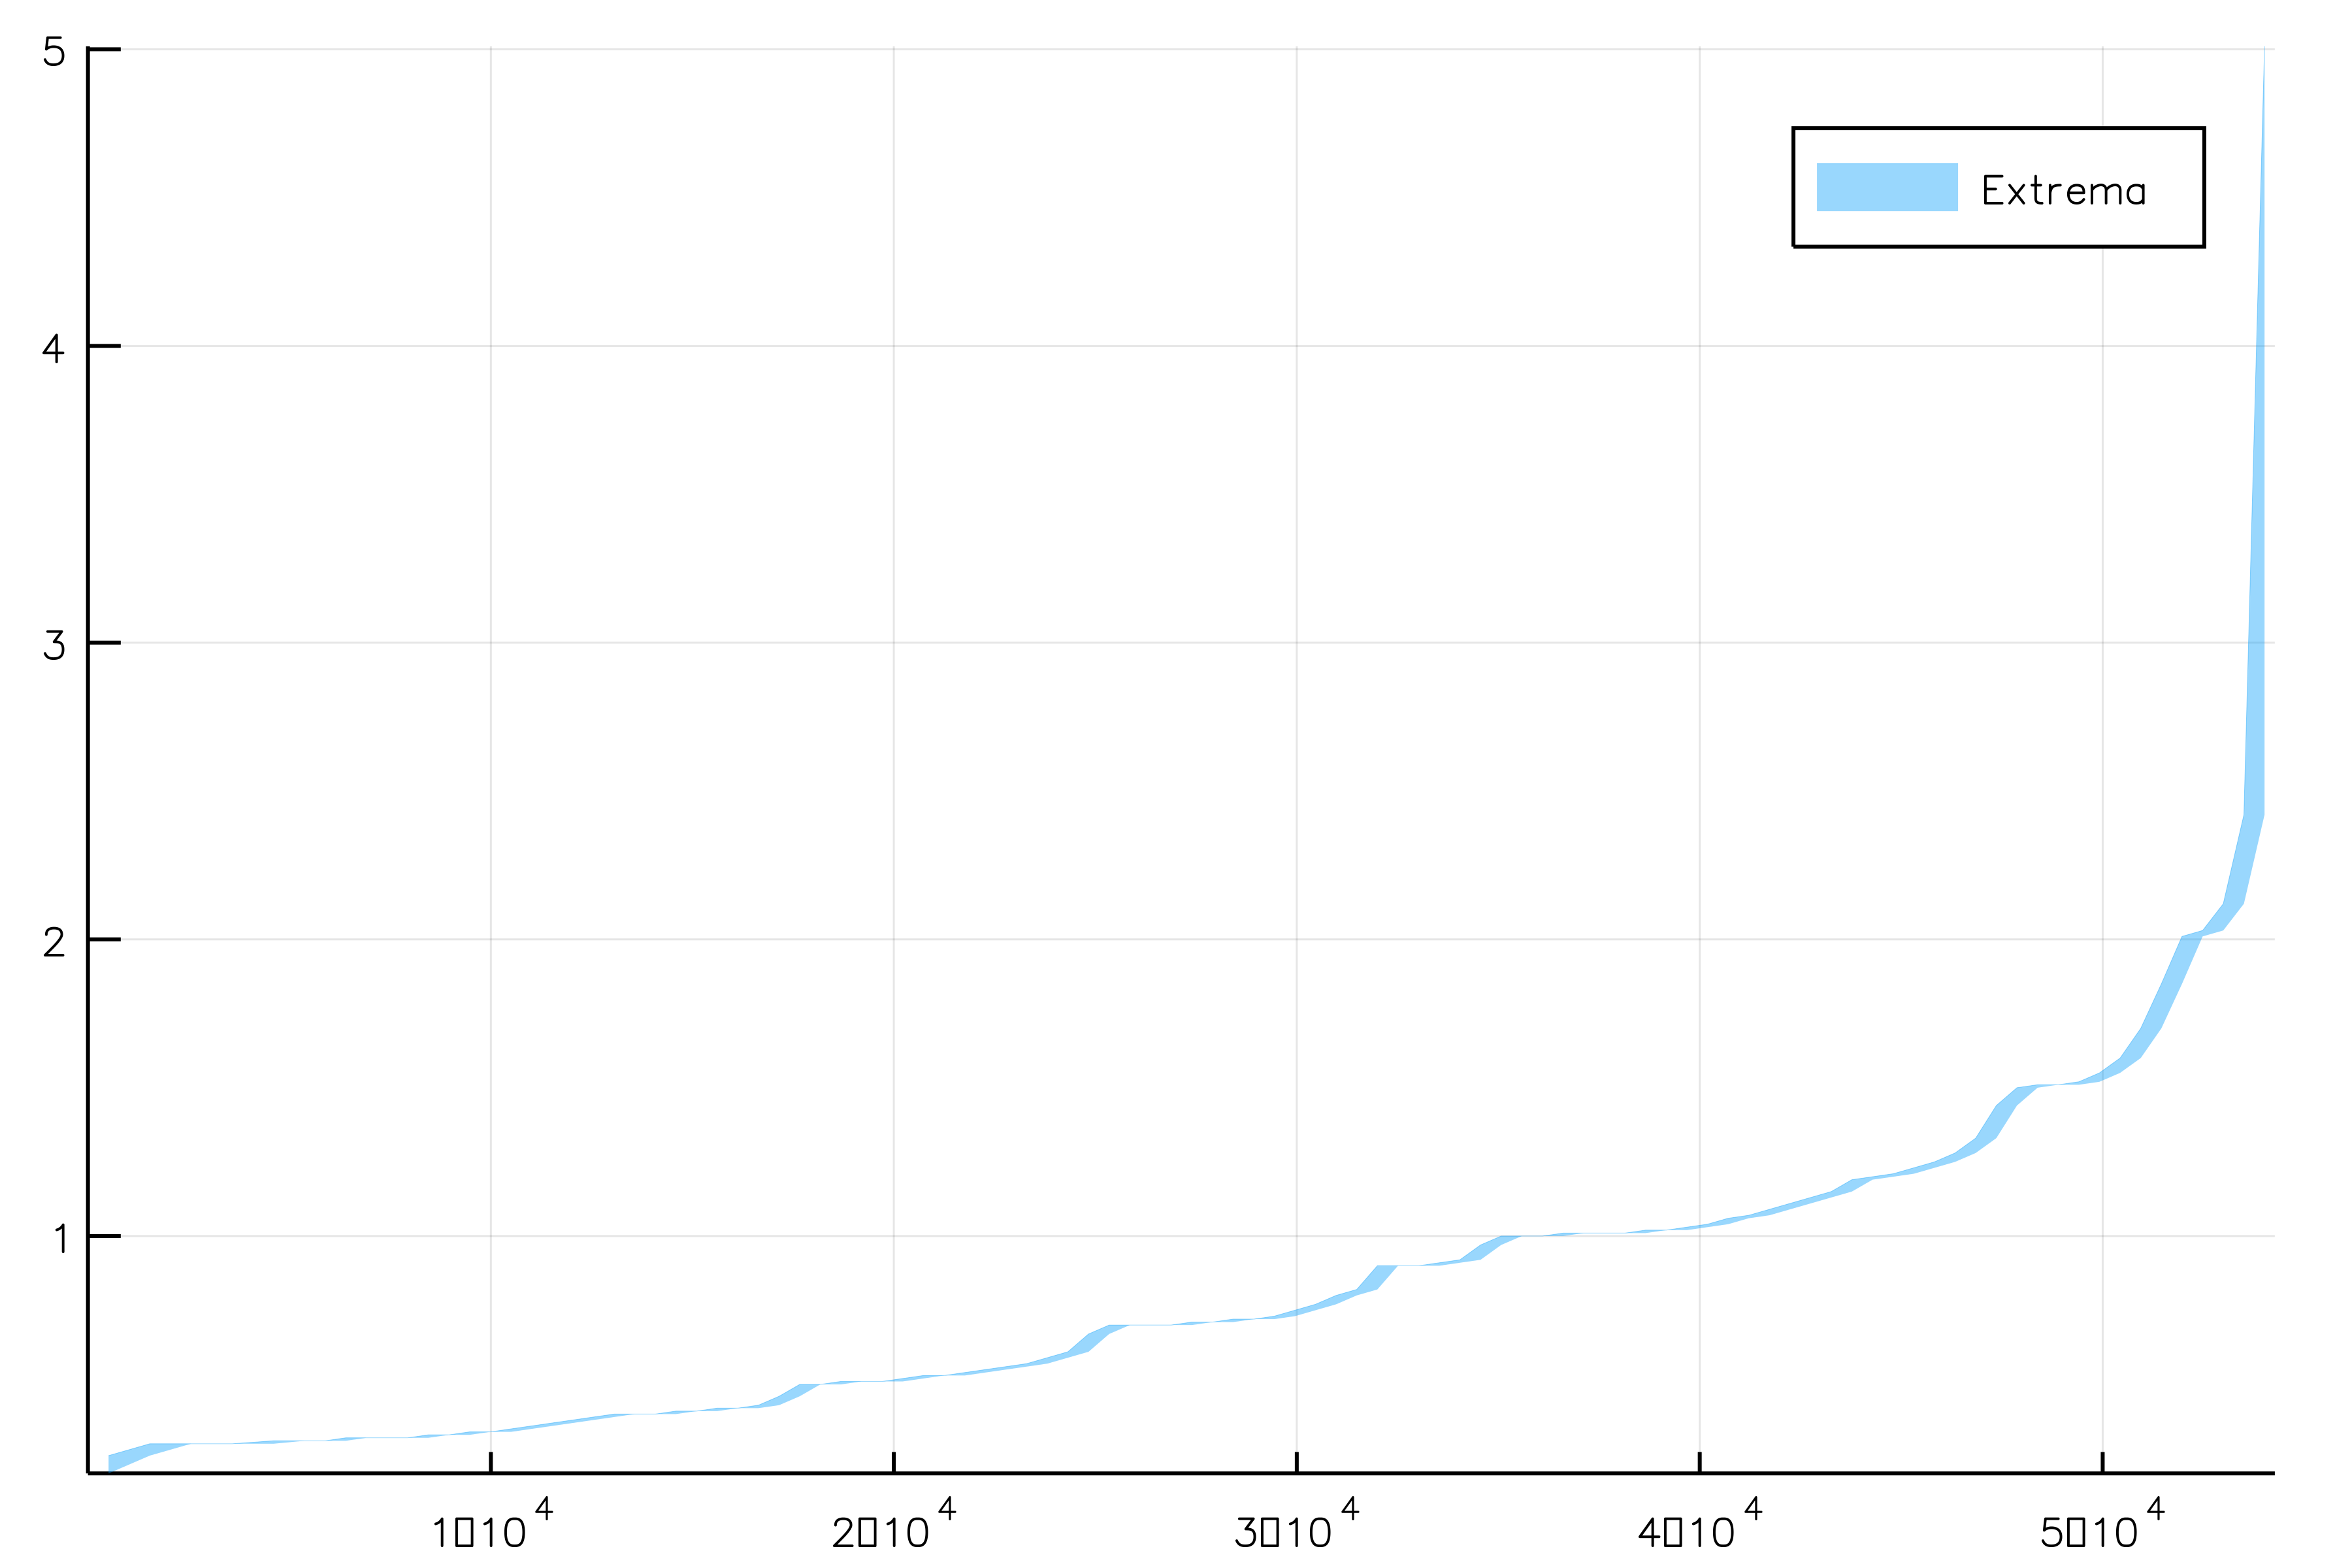

In [11]:
partitionplot(t, :carat)